In [12]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggforce)
library(svglite)
library(extrafont)
library(gridExtra)
library(grid)
library(cowplot)
library(ggrepel)
library(stringr)

# Comparing Network Events Timestamps

In [8]:
datareal <- read.csv("logs_singleed/singleed_timeonair_real_dur.csv", sep = ",") %>% mutate(DR=paste("DR",DR)) %>% group_by(DR, sample) %>% mutate(relstart = end-min(start), nameC=paste("Real"))
head(datareal)
datans <- read.csv("logs_singleed/singleed_timeonair_ns_dur.csv", sep = ",") %>% mutate(DR=paste("DR",DR)) %>% group_by(DR) %>% mutate(relstart = timestamp) 
head(datans)



addr,event,start,end,freq,size,DR,sample,relstart,nameC
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<dbl>,<chr>
00:80:E1:15:05:AB:D0:6C,TX,1731699147,1731699147,867900000,21,DR 5,1,0.05799985,Real
00:80:E1:15:05:AB:D0:6C,TX,1731699177,1731699177,867900000,18,DR 5,1,30.05900002,Real
00:80:E1:15:05:AB:D0:6C,TX,1731699207,1731699207,867300000,18,DR 5,1,60.06499982,Real
00:80:E1:15:05:AB:D0:6C,TX,1731699237,1731699237,867500000,18,DR 5,1,90.07099986,Real
00:80:E1:15:05:AB:D0:6C,TX,1731699267,1731699267,867100000,18,DR 5,1,120.07699990,Real
00:80:E1:15:05:AB:D0:6C,TX,1731699297,1731699297,867100000,18,DR 5,1,150.08299994,Real


DR,timestamp,threshold,event,device,nb_ED,seed,objSize,distance,fport,policy,relstart
<chr>,<dbl>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
DR 0,12.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,12.30848
DR 0,42.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,42.30848
DR 0,72.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,72.30848
DR 0,102.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,102.30848
DR 0,132.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,132.30848
DR 0,162.30848,NA,TX,0110110|0000000000000011101001000,1,1,2000,0,28,FIXED_BY_USER,162.30848


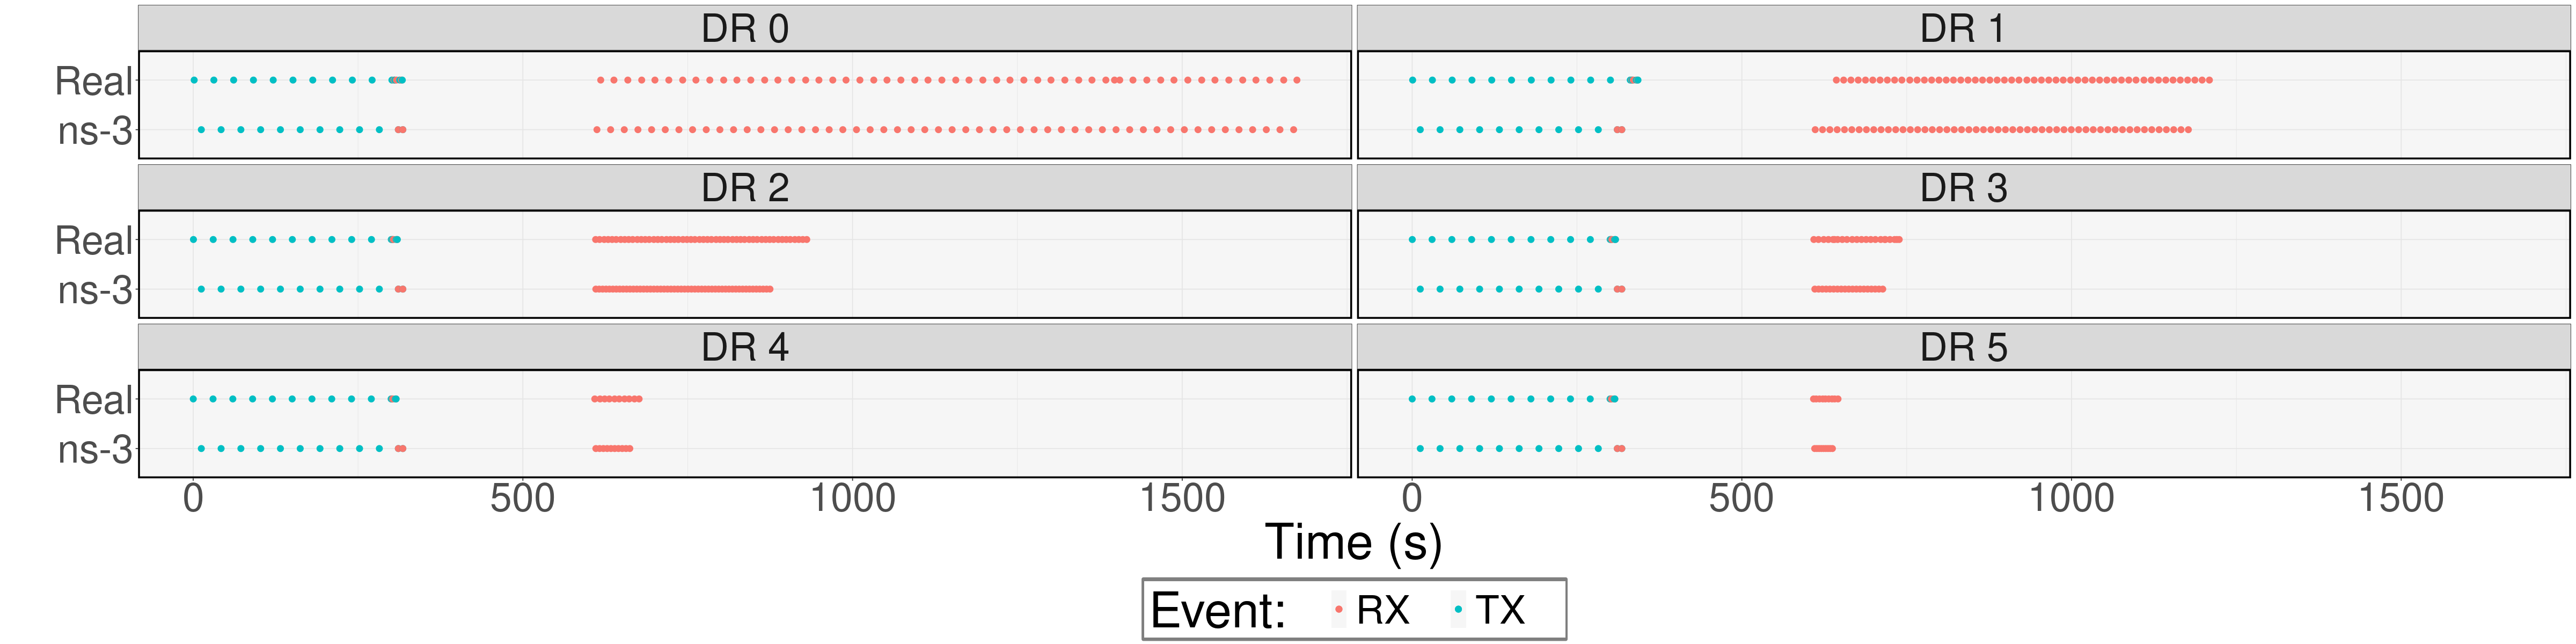

In [9]:

options(repr.plot.width=40, repr.plot.height=10)
datarealFig <- datareal %>% filter(sample==1)
p <- ggplot() + 
    geom_point(data=datarealFig, aes(x=relstart, y=nameC, color=interaction(event)), size=3,alpha=1)+
    geom_point(data=datans, aes(x=relstart, y="ns-3", color=interaction(event)), size=3,alpha=1)+
    facet_wrap(~DR, ncol=2, ) +
    theme_bw() +
    labs(x="Time (s)", y="", color="Event:   ")+
    theme( text = element_text(size = 55), 
          legend.position="bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p
ggsave("single_node_fuota_dur_compar.pdf", plot=p, width=40, height=12)
embed_fonts("single_node_fuota_dur_compar.pdf")

# Comparing Energy Consumption

In [10]:
data <- read.csv("logs_singleed/singleed_timeonair_power.csv", sep = ",") 
head(data)

datansStat <- data %>%
  group_by(DR,size) %>%
  summarise(n=n(), mean=mean(energy), sd=sd(energy)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
datansStat


options(repr.plot.width=20, repr.plot.height=20)


,expe,DR,size,energy,sample
,<chr>,<int>,<int>,<dbl>,<int>
1,ns-3,0,2000,30.6462,1
2,real,0,2000,33.3000,1
3,real,0,2000,33.2700,2
4,real,0,2000,33.3400,3
5,real,0,2000,33.3000,4
6,real,0,2000,33.2200,5


`summarise()` has grouped output by 'DR'. You can override using the `.groups`
argument.


DR,size,n,mean,sd,se,ic
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,2000,6,32.846033,1.0784285,0.44026659,1.1317413
1,2000,6,20.535650,0.5829826,0.23800166,0.6118027
2,2000,6,14.251517,0.8899399,0.36331644,0.9339346
3,2000,6,9.818582,0.4505145,0.18392179,0.4727860
4,2000,6,8.411025,0.4269078,0.17428440,0.4480123
5,2000,6,7.515122,0.2404011,0.09814336,0.2522855


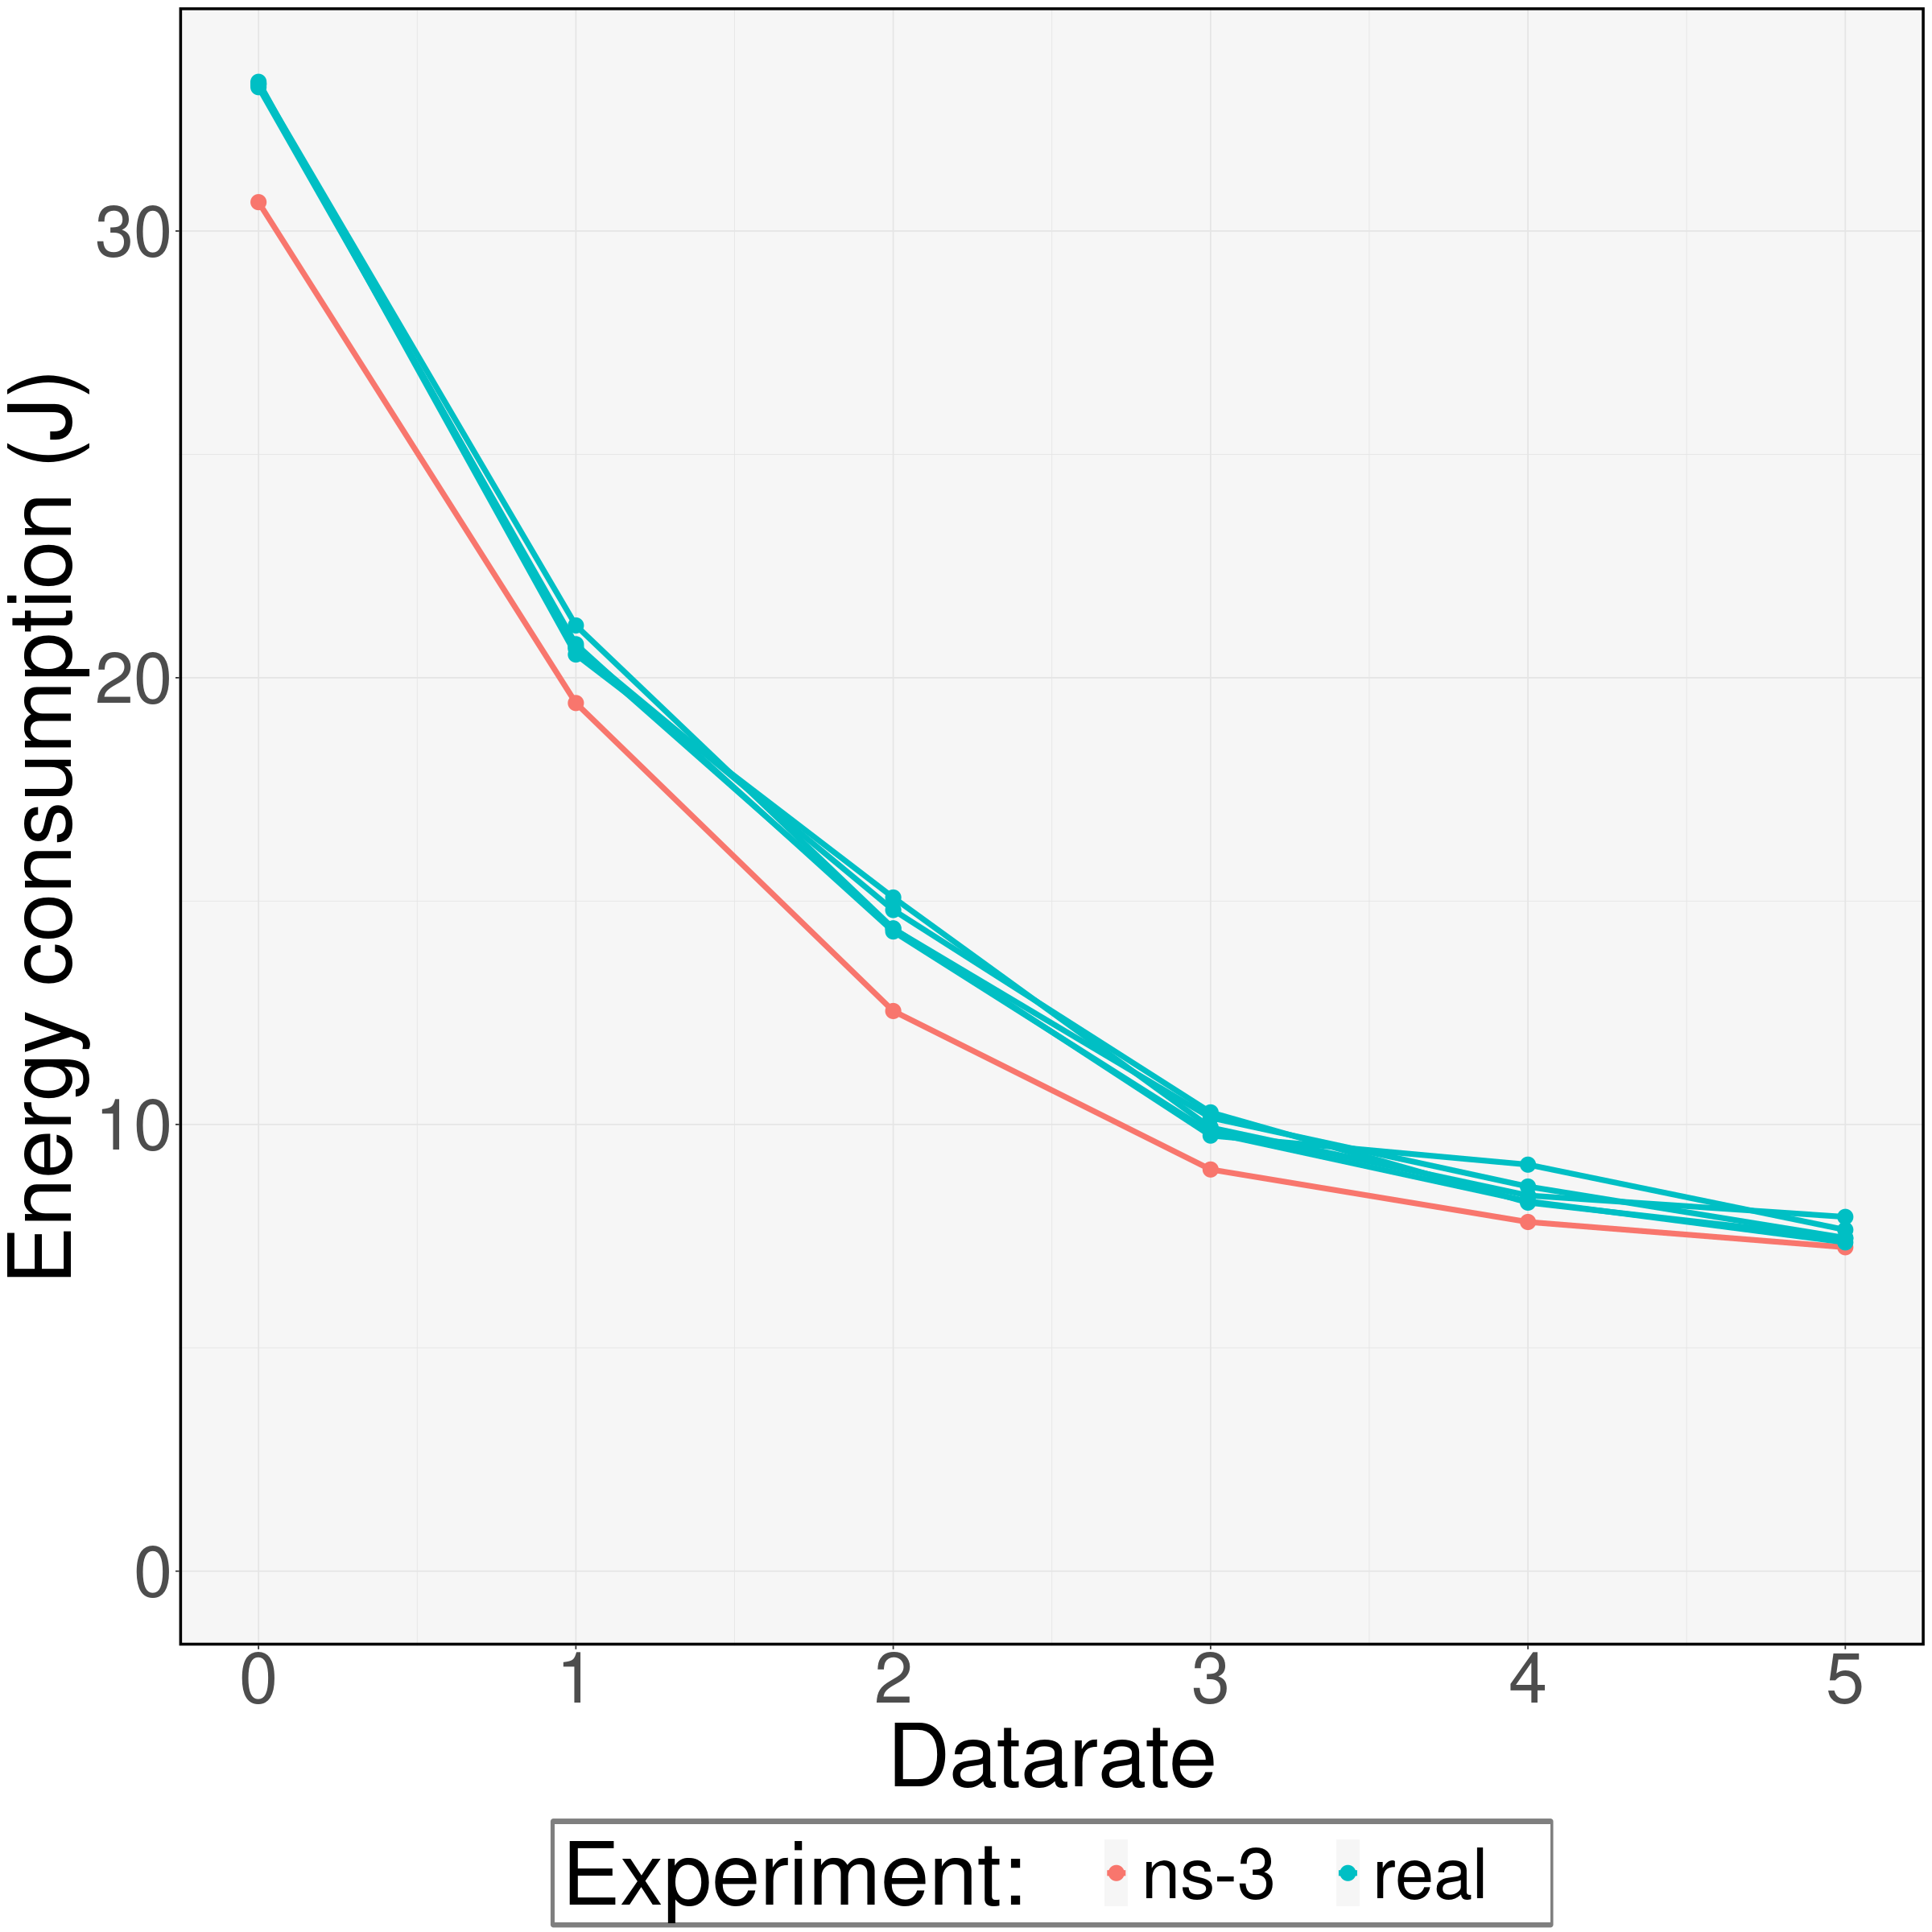

In [11]:

p <- ggplot(data=data, aes(x=DR, y=energy, color=interaction(expe), fill=interaction(expe,sample))) + 
    #geom_bar( color="black", position="dodge", size=5,alpha=0.4, stat="identity")+

    geom_line(linewidth=2) +
    geom_point(size=5)+
    expand_limits(ymin=0)+
    theme_bw() +
    labs(x="Datarate", y="Energy consumption (J)", color="Experiment:   ")+ guides(fill="none")+
    theme( text = element_text(size = 65),
          legend.position="bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p
ggsave("single_node_fuota_energy_compar.pdf", plot=p, width=30, height=22)
embed_fonts("single_node_fuota_energy_compar.pdf")